In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [119]:
import numpy as np
import pandas as pd 

#Set the random seed for reproducibility
np.random.seed(123)

#create a dataframe with two classes
n_samples = 1000
class_0_ratio =0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples-n_class_0

In [120]:
print("class0",n_class_0)
print("class1",n_class_1)

class0 900
class1 100


In [121]:
#create datafrme
class_0 =pd.DataFrame({
    'feature_1':np.random.normal(loc =0,scale =1,size =n_class_0),
    'feature_2':np.random.normal(loc =0,scale =1,size =n_class_0),
    'target':[0]*n_class_0
    
})

class_1 =pd.DataFrame({
    'feature_1':np.random.normal(loc =2,scale =1,size =n_class_1),
    'feature_2':np.random.normal(loc =2,scale =1,size =n_class_1),
    'target':[1]*n_class_1
    
})

In [122]:
df =pd.concat([class_0,class_1]).reset_index(drop = True)

In [123]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [124]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [125]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

1. **Up Sampling:**

In [126]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target']  == 0]

In [127]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,replace = True
        ,n_samples =len(df_majority),
         random_state = 42
        )

In [128]:
df_minority_upsampled.shape

(900, 3)

In [129]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [130]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [131]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

2. **Down Sampling:**

In [132]:
import numpy as np
import pandas as pd 

#Set the random seed for reproducibility
np.random.seed(123)

#create a dataframe with two classes
n_samples = 1000
class_0_ratio =0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples-n_class_0

In [133]:
#create datafrme
class_0 =pd.DataFrame({
    'feature_1':np.random.normal(loc =0,scale =1,size =n_class_0),
    'feature_2':np.random.normal(loc =0,scale =1,size =n_class_0),
    'target':[0]*n_class_0
    
})

class_1 =pd.DataFrame({
    'feature_1':np.random.normal(loc =2,scale =1,size =n_class_1),
    'feature_2':np.random.normal(loc =2,scale =1,size =n_class_1),
    'target':[1]*n_class_1
    
})


In [134]:
df =pd.concat([class_0,class_1]).reset_index(drop = True)

In [135]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target']  == 0]

In [136]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority,replace = False
        ,n_samples =len(df_minority),
         random_state = 42
        )

In [137]:
df_majority_downsampled.shape

(100, 3)

In [138]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

In [139]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

# SMOTE(Synthetic Minority Oversampling Technique)

SMOTE is a technique used in machine learning to address imbalanced dataset where the minority class has significantly fewer instances than the majority class.SMOTE involves generating synthetic instances of the minority class by interpreting between existing instances.

 Synthetic Minority Oversampling Technique (SMOTE) is a statistical method for balancing the distribution of classes in a dataset. It does this by creating synthetic samples from the minority class

1. **How it works**

  1. SMOTE selects a random example from the minority class
  2. It finds the nearest neighbors of that example using K Nearest Neighbors
  3. It draws a line between the example and its nearest neighbors
  4. It generates a new synthetic example at a random point along that line


 **Why it's useful**

   1. SMOTE is useful for dealing with imbalanced datasets, where one class has many more observations than the other 
   2. It helps to avoid overfitting that can occur with random oversampling 
   3. It can improve the performance of a classifier by increasing the number of minority class examples

      
 Limitations

1. SMOTE doesn't consider the majority class when creating synthetic examples
2. This can cause problems if the classes overlap strongly

In [140]:
from sklearn.datasets import make_classification


In [141]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=1000, n_features=2, 
                           n_clusters_per_class=1, 
                           weights=[0.90], random_state=12, 
                           n_redundant=0)


In [142]:
import pandas as pd
df1 = pd.DataFrame(x,columns = ['f1','f2'])
df2 =pd.DataFrame(y,columns = ['target'])
final_df =pd.concat([df1,df2],axis = 1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [143]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

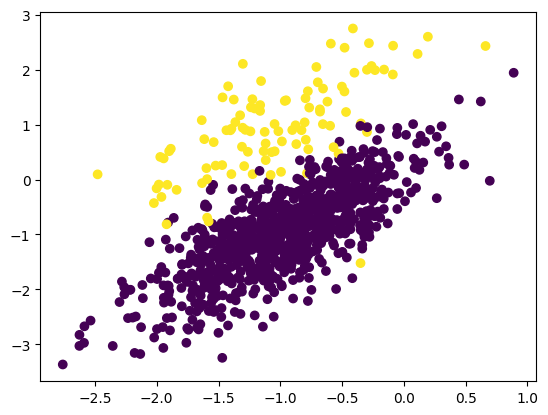

In [144]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c =final_df['target'] )

In [145]:
!pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [146]:
#from imblearn.oversampling import SMOTE
from imblearn.over_sampling import SMOTE


In [147]:
#transform the dataset
# Apply SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(final_df[['f1', 'f2']], final_df['target'])


In [148]:
x_resampled.shape

(1800, 2)

In [149]:
y_resampled.shape

(1800,)

In [150]:
y_resampled[y_resampled[y_resampled==0]]

0    0
0    0
0    0
0    0
0    0
    ..
0    0
0    0
0    0
0    0
0    0
Name: target, Length: 900, dtype: int64

In [151]:
y_resampled[y_resampled[y_resampled==1]]

1    0
1    0
1    0
1    0
1    0
    ..
1    0
1    0
1    0
1    0
1    0
Name: target, Length: 900, dtype: int64

In [152]:
print("length of the class_0:",len(y_resampled[y_resampled==0]))
print("length of the class_1:",len(y_resampled[y_resampled==1]))

length of the class_0: 900
length of the class_1: 900


In [153]:
df1 =pd.DataFrame(x_resampled,columns =['f1','f2'])
df2 = pd.DataFrame(y_resampled,columns =['target'])
oversampled_df = pd.concat([df1,df2],axis =1)

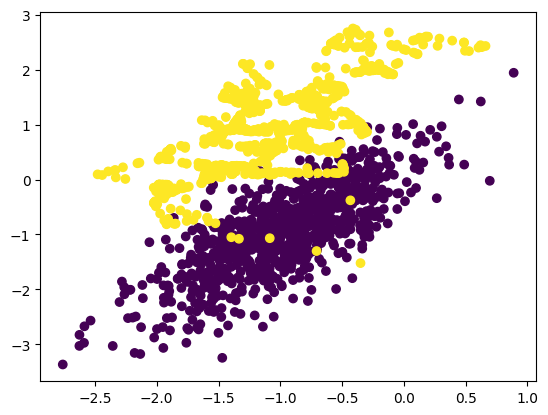

In [154]:
import matplotlib.pyplot as plt

plt.scatter(oversampled_df['f1'],oversampled_df['f2'],c =oversampled_df['target'])